# Проект: Принятие решений в бизнесе

## Введение

### Контекст

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовил список гипотез для увеличения выручки.

### Цель работы

Выполнить приоритизацию гипотез, запустить A/B-тест и проанализировать результаты.

### Описание данных

#### Данные для первой части

Файл /datasets/hypothesis.csv

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для второй части

Файл /datasets/orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

- date — дата;
- group — группа A/B-теста;


### Загрузка данных

In [ ]:
# Импорт библиотек
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import datetime as dt
from datetime import datetime, timedelta
#import time
import numpy as np
#import random
import matplotlib as mp
import matplotlib.pyplot as plt
#import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
# Настройка формата отображения чисел с типом  float в pandas
pd.set_option("display.float_format", "{:.2f}".format)
register_matplotlib_converters()
pd.options.display.max_colwidth = 130

In [2]:
try:
    open('/home/NieR/NierAutomata/Practicum/datasets/hypothesis.csv')
    data = '/home/NieR/NierAutomata/Practicum/datasets/hypothesis.csv'
    open('/home/NieR/NierAutomata/Practicum/datasets/orders.csv')
    orders = '/home/NieR/NierAutomata/Practicum/datasets/orders.csv'
    open('/home/NieR/NierAutomata/Practicum/datasets/visitors.csv')
    visitors = '/home/NieR/NierAutomata/Practicum/datasets/visitors.csv'
except:
    data = '/datasets/hypothesis.csv'
    orders = '/datasets/orders.csv'
    visitors = '/datasets/visitors.csv'

In [3]:
def view(file_path):
    with open(file_path, 'r') as file:
        for i in range(5):
            print(file.readline())
    file.close()
    return

In [4]:
def overview(list):
    for i in range(len(list)):
        print('Первые пять строк файла "', list[i], '":\n')
        view(list[i])
        print('\n')
    return

In [5]:
overview([data,orders,visitors])

Первые пять строк файла " /datasets/hypothesis.csv ":

Hypothesis,Reach,Impact,Confidence,Efforts

"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6

"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10

"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3

"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8



Первые пять строк файла " /datasets/orders.csv ":

transactionId,visitorId,date,revenue,group

3667963787,3312258926,2019-08-15,1650,B

2804400009,3642806036,2019-08-15,730,B

2961555356,4069496402,2019-08-15,400,A

3797467345,1196621759,2019-08-15,9759,B



Первые пять строк файла " /datasets/visitors.csv ":

date,group,visitors

2019-08-01,A,719

2019-08-02,A,619

2019-08-03,A,507

2019-08-04,A,717





<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** Данные датасетов  в csv файлах представлены в стандартном формате, с разделителем ",". Импорт содержимого файлов можно выполнить стандартными средствами, без указания дополнительных параметров.
    
</div>

### Загрузка файлов с данными в датафреймы pandas

In [6]:
data, orders, visitors = (pd.read_csv(data),
                                pd.read_csv(orders),
                                pd.read_csv(visitors)
                                )

### Обзор общей информации датафреймов

In [7]:
def overview_df(list):
    for i in range(len(list)):
        print(list[i].info())
        display(list[i].head())
        print('Количество явных дубликатов:', list[i].duplicated().sum())
        print('\nКоличество пропусков в столбцах:\n')
        print(list[i].isna().sum())
        print('\n\n')
    return

In [8]:
overview_df([data,orders,visitors])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Количество явных дубликатов: 0

Количество пропусков в столбцах:

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Количество явных дубликатов: 0

Количество пропусков в столбцах:

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Количество явных дубликатов: 0

Количество пропусков в столбцах:

date        0
group       0
visitors    0
dtype: int64





### Предобработка данных

#### Переименование столбцов

In [9]:
def rename(list):
    for i in range(len(list)):
        list[i].columns = [x.lower().replace(' ', '_') for x in list[i].columns]
    return

In [10]:
rename([data,orders,visitors])

In [11]:
# Некоторые столбцы будут переименованы, для того чтобы можно было воспользоваться наработками ранее написанного кода
orders = orders.rename(columns={'transactionid':'orderId', 'visitorid':'userId'})

#### Изменение типов данных

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** Данные датасетов загружены в датафреймы и подготовлены для дальнейшего анализ. Мы проверили их на наличие пропусков (пропуски отсутствуют), наличие явных дубликатов (дубликаты отсутствуют), соответствие типов данных (исправили тип данных в столбцах даты и времени), исправили стилистические ошибки (привели названия всех столбцов в датафреймах к единому стилю).
    
 </div>

### Проведем дополнительный исследовательский анализ имеющихся данных

#### Посмотрим сколько у нас групп в АВ-тесте

In [13]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Данные для АВ-теста представлены двумя группами - А и В.

#### Рассмотрим количество пользователей в каждой группе - по таблице с заказами

In [14]:
orders.groupby('group', as_index=False).agg({'userId': pd.Series.nunique})

,group,userId
0,A,503
1,B,586


Количество пользователей в группе Б больше, чем в группе А, примерно на 20%

#### Посмотрим динамику посетителей по дням по группам

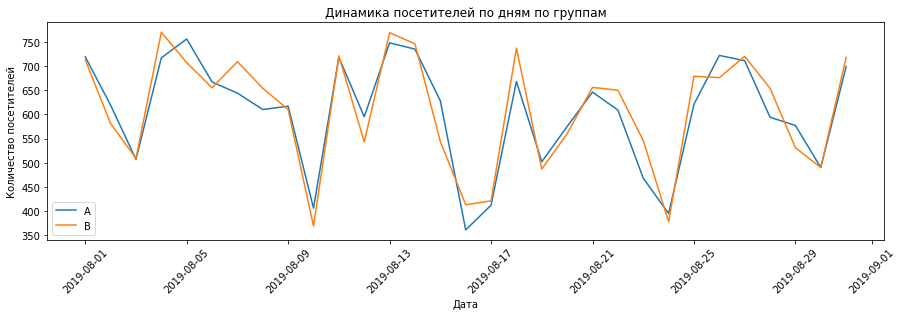

In [15]:
plt.figure(figsize=(15, 4))
visitors_A = visitors[visitors['group']=='A']
visitors_B = visitors[visitors['group']=='B']
plt.plot(visitors_A['date'], visitors_A['visitors'], label='A')
plt.plot(visitors_B['date'], visitors_B['visitors'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("Динамика посетителей по дням по группам")
plt.ylabel("Количество посетителей")
plt.xlabel("Дата")

plt.show()

Как видно из графика, динамика посетителей по дням совпадает в обеих группах, находится в диапазоне от 350 до 750 посетителей в день и имеет ярко выраженную цикличность

## Часть 1. Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [16]:
data['ICE'] = data['impact'] * data['confidence']/data['efforts']
data['ICE'] = data['ICE'].astype('float')
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Применив фреймворк ICE мы получили три наиболее перспективные для изучения гипотезы:
1) Запустить акцию, дающую скидку на товар в день рождения;
2) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
3) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    
Фреймворк ICE приоритизирует гипотезы с учетом следующих параметров:    
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу.

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [17]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence']/data['efforts']
data['RICE'] = data['RICE'].astype('float')
display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Применив фреймворк RICE мы получили три наиболее перспективные для изучения гипотезы:
1) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
3) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    
Фреймворк RICE приоритизирует гипотезы с учетом следующих параметров:    
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу;
- Reach — скольких пользователей затронет изменение, которое вы хотите внести.

### Отличия результатов приоритизации гипотез при применении RICE вместо ICE.

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
        
В отличии от ICE, фреймворк RICE использует в качестве параметра также и охват количества пользователей, которых затронет предполагаемое изменение.

Сравнение результатов показывает, что "Запустить акцию, дающую скидку на товар в день рождения" - потенциально выгодное изменение, но оно охватит сравнительно небольшую группу пользователей. Поэтому оценка ранга этого изменения с применением фреймворка RICE переместила эту гипотезу с первого места на середину списка.
    
Наиболее перспективными гипотезами, вошедшими в первую тройку при применении как одного, так и другого фреймворка, являются:
    
1) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    
2) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
</div>

## Часть 2. Анализ A/B-теста

Я провел A/B-тест и получил результаты, которые описаны в файлах orders.csv и visitors.csv

In [18]:
display(orders.head())
display(visitors.head())

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проведем анализ A/B-теста. Но сначала проведем дополнительную предобработку даннных.

### Предобработка данных для А/В-теста

Посчитаем общее количество пользователей, принявших участие в тесте

In [19]:
userId_unique_before = len(orders['userId'].unique())

Проверим датасет на наличие пользователей, которые присутствуют одновременно и в группе А, и в группе Б.

In [20]:
userId_A = orders['userId'].loc[orders['group']=='A'].unique()
userId_B = orders['userId'].loc[orders['group']=='B'].unique()
userId_A_B = np.intersect1d(userId_A,userId_B)
len(userId_A_B)

58

В нашем датасете оказалось 58 таких пользователей. Запомним userId этих в переменной userId_A_B.

Проверим датасет на наличие статистических выбросов и аномалий

In [21]:
 orders['revenue'].describe()

count      1197.00
mean       8348.01
std       39191.13
min          50.00
25%        1220.00
50%        2978.00
75%        8290.00
max     1294500.00
Name: revenue, dtype: float64

Максимальная сумма заказа отличается более чем на порядок от стоимости медианного заказа. Построим "ящик с усами" и посмотрим, сколько пользователей вышло за пределы статистической нормы.

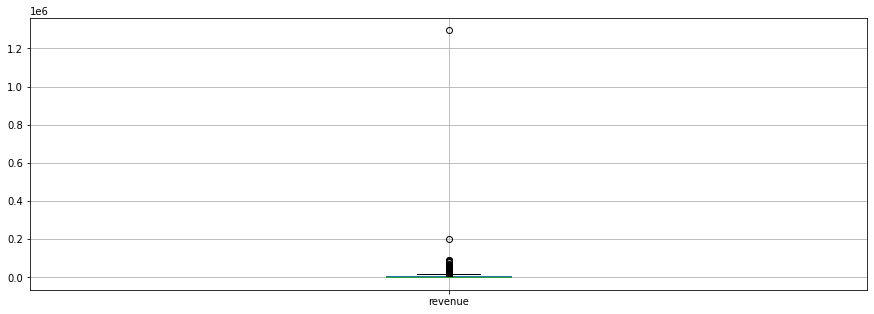

In [22]:
plt.figure(figsize=(15, 5))
orders.loc[:,['revenue']].boxplot()
plt.show()

На графике видно, что два заказа сильно выбиваются от статистической нормы.

In [23]:
display(orders.loc[orders['revenue']>200000])

,orderId,userId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


Запомним пользователей, совершивших заказы с аномально высокой стоимостью - запишем userId этих пользователей в переменную userId_MaxRevenue.

In [24]:
userId_MaxRevenue = orders['userId'].loc[orders['revenue']>200000]

Посмотрим на активность пользователей. Оценим максимальное количесто заказов совершенное одним пользователем

In [25]:
orders.pivot_table(index='userId', values='orderId', aggfunc='count').max()

orderId    11
dtype: int64

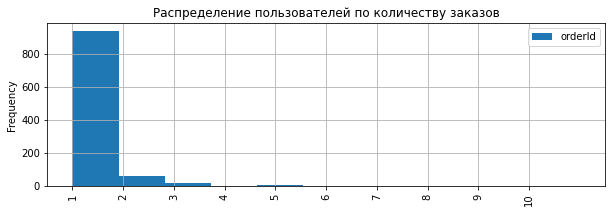

In [26]:
orders.pivot_table(index='userId', values='orderId', aggfunc='count').plot(kind='hist',
                           xticks=range(1, 11),
                           bins=11,
                           grid=True,
                           rot=90,
                           title='Распределение пользователей по количеству заказов',
                           legend=True,
                           figsize=(10, 3));
plt.show()

Как видно из графика, стандартное количество заказов, совершенных одним пользователем, не превышает 5. Запомним пользователей, проявлявших слишком высокую активность - запишем userId этих пользователей в переменную userId_MaxCountOrders.

In [27]:
userId_MaxCountOrders = orders.pivot_table(index='userId', values='orderId', aggfunc='count').query('orderId>5').index

Исключим из датафрейма пользователей:
- попавших в обе группы, А и В,

Пользователей:
- совершавшавших заказы с аномально всокой ценой,
- совершавших аномально большое количество заказов,

исключать пока не будем.

In [28]:
orders_len_before = len(orders)

# Я решил последовательно исключить каждую группу:
orders = orders.loc[((orders['userId'].isin(list(userId_A_B))!=True))]
#orders = orders.loc[((orders['userId'].isin(list(userId_MaxRevenue))!=True))]
#orders = orders.loc[((orders['userId'].isin(list(userId_MaxCountOrders))!=True))]

orders_len_after = len(orders)
userId_unique_after = len(orders['userId'].unique())

Посмотрим, какой процент записей датафрейма мы потеряли в результате предобработки.

In [29]:
round(100-100*orders_len_after/orders_len_before,1)

15.1

Посмотрим, какой процент от общего количества пользователей в результате предобработки оказался выброшен из анализа.

In [30]:
round(100-100*userId_unique_after/userId_unique_before,1)

5.6

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
        
В результате предобработки мы потеряли 15.1% записей в датафрейме. Это достаточно высокий процент потерь: он связан с исключением из датафрейма пользователей, попавших в обе группы (58 пользователей).
    
<s>Мы также исключили из датафрейма статистические выбросы и аномалии: чрезмерно активных пользователей и пользователей совершавших заказы с аномально большой стоимостью. Однако это не привело к большим потерям: этим фактором было вызвано только 0.02% потерь - из датафрейма были исключены данные по 6 пользователям.</s>
    
В датафрейме содержаться данные о пользователях, поведение которых можно отнести к выбросам и статистическим аномалиям - но исключать их мы пока не будем. На последнем этапе работы мы проведем сравнительный анализ - с учетом и без учета таких пользователей.
    
На итог мы потеряли информацию о 5.6%  пользователей - этот процент уже не выглядит  слишком критичным.
    
И это обоснованные потери: ведь если пользователь участвовал в обеих группах, то нельзя сказать, участие в какой из них повлияло на его поведение. Таких пользователей лучше исключить.
</div>

### Построим график кумулятивной выручки по группам

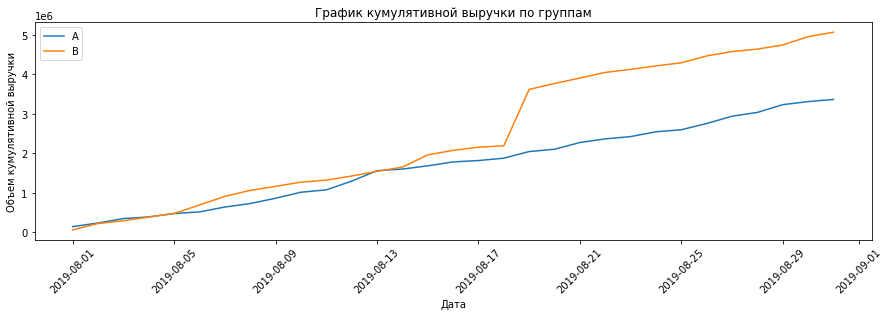

In [31]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("График кумулятивной выручки по группам")
plt.ylabel("Объем кумулятивной выручки")
plt.xlabel("Дата")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
    
Похоже, что группа  Б стабильно показывает более высокие показатели кумулятивной выручки, но превышение, хотя оно и есть - незначительное.

17 августа заметен резкий подъем в группе Б - видимо, это следствие неисключенных нами выбросов и аномалий
</div>

### Построим график кумулятивного среднего чека по группам

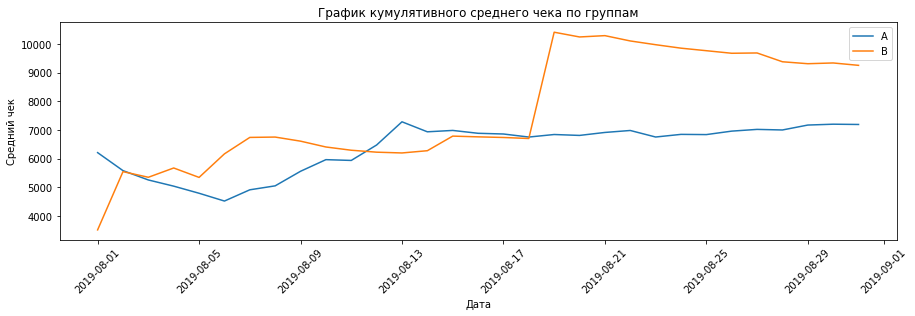

In [32]:
plt.figure(figsize=(15, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("График кумулятивного среднего чека по группам")
plt.ylabel("Средний чек")
plt.xlabel("Дата")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**

Кумулятивный средний чек по группам показываетколебания в начале периода, но затем выравнивается. В отличие от объема выручки, удельный показатель среднего чека отражает, что в среднем пользователи группы А делали покупок на большую сумму, чем пользователи группы Б
    
Мы видим на графике, как 17 августа поменялся средний чек в группе Б, а затем наметилась тенденция  к выравниванию средней - видимо, в этот период в группе Б были совершены заказы на довольно крупную сумму, которая существенно повлияла на значение среднего чека
</div>

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

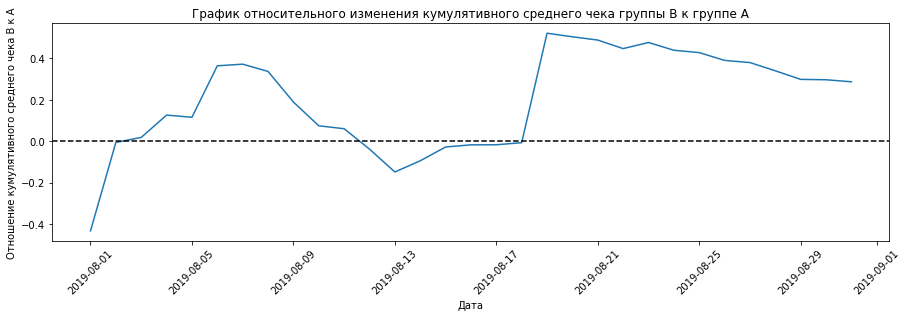

In [33]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.ylabel("Отношение кумулятивного среднего чека В к А")
plt.xlabel("Дата")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
    
Средний чек пользователей группы Б существенно превышает аналогичный показатель группы А. Однако неизвестно, не является ли это следствием единичных аномально крупных покупок, выявленных нами на предыдущем этапе.
</div>

### Построим график кумулятивного среднего количества заказов на посетителя по группам

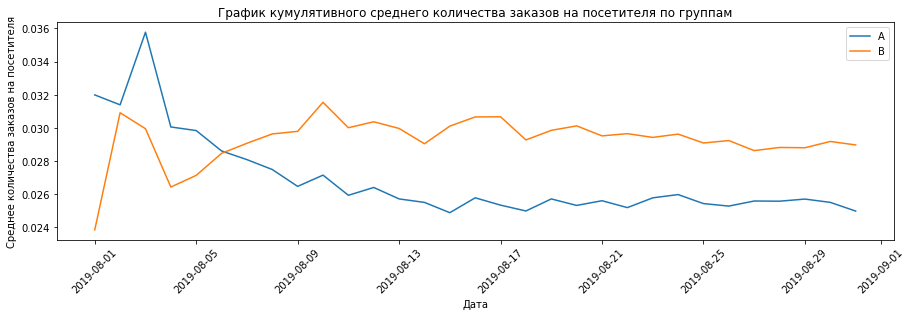

In [34]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")
plt.ylabel("Среднее количества заказов на посетителя")
plt.xlabel("Дата")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
    
Кумулятивное среднее количество заказов на посетителя в группе Б превышает значение аналогичного показателя группы А
</div>

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

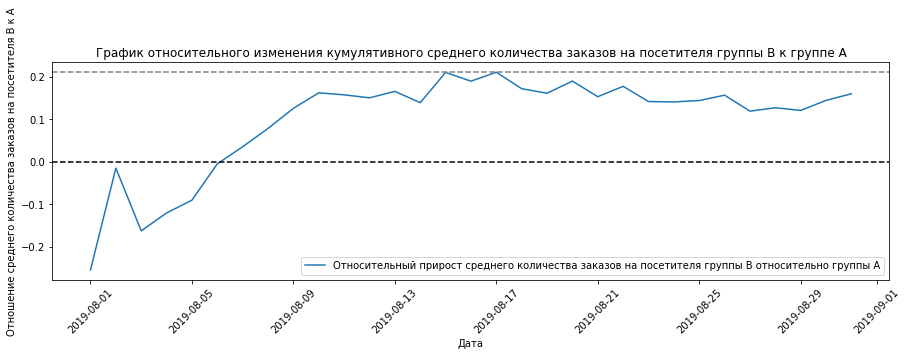

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,  label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.ylabel("Отношение среднего количества заказов на посетителя В к А")
plt.xlabel("Дата")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
    
На графике мы видим, что относительный прирост среднего количества заказов на посетителя в группе Б превышал аналогичный показатель группы А на примерно на 15 (в моменте - на 20) процентов
</div>

### Построим график количества заказов по пользователям

In [36]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

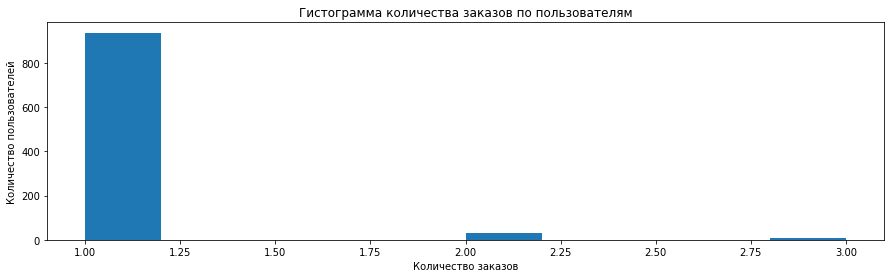

In [37]:
# Построим гистограмму распределения числа заказов по пользователям
plt.figure(figsize=(15, 4))
plt.hist(ordersByUsers['orders'])
plt.title("Гистограмма количества заказов по пользователям")
plt.ylabel("Количество пользователей")
plt.xlabel("Количество заказов")
plt.show()

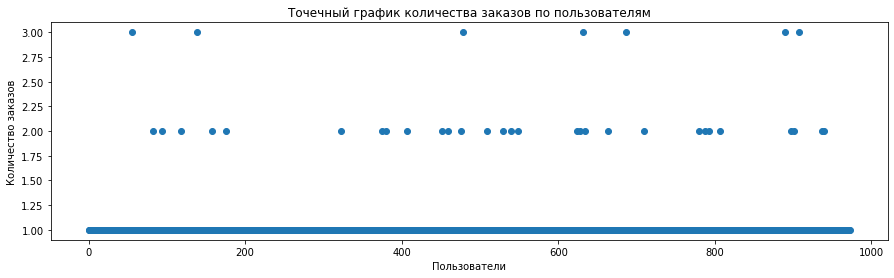

In [38]:
# Построим точечный график количества заказов по пользователям
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15, 4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям")
plt.ylabel("Количество заказов")
plt.xlabel("Пользователи")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
    
Из графика видно, что в среднем один пользователь делал один заказ, за редким исключением - два или три заказа.
</div>

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [39]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**    

Пользователи, которые делали три заказа составляют менее 1% от общего числа. Граница 99 перцентиля составляет 2 заказа на пользователя.
</div>

### Построим график стоимостей заказов

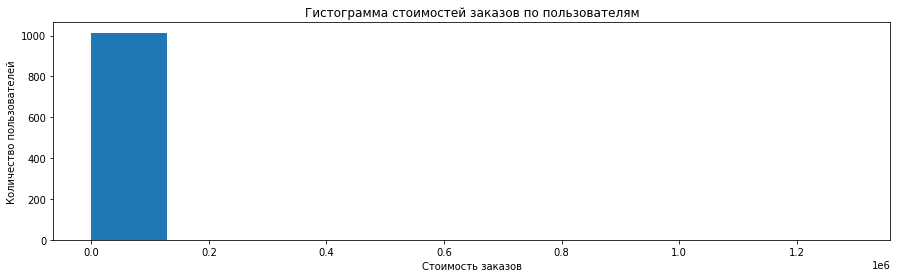

In [40]:
# Построим гистограмму распределения выручекс заказов по пользователям методом hist()
plt.figure(figsize=(15, 4))
plt.hist(orders['revenue'])
plt.title("Гистограмма стоимостей заказов по пользователям")
plt.ylabel("Количество пользователей")
plt.xlabel("Стоимость заказов")
plt.show()

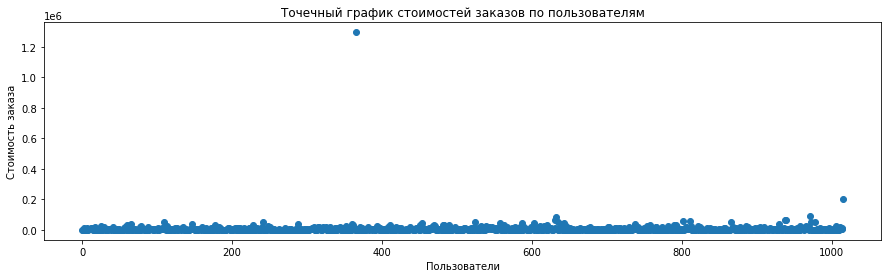

In [41]:
# Построим точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 4))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов по пользователям")
plt.ylabel("Стоимость заказа")
plt.xlabel("Пользователи")
plt.show()

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
    
В основном, стоимость заказа не превышает 20 000, даже несколько ниже этой цифры. На графике видно два резко выбивающихся из общей картины выброса. Мы уже выявили их раньше, на этапе предобработки данных - на графике мы обнаружили их с помощью визуализации.
</div>

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [42]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

<div style="border:solid Blue 2px; padding: 20px">

**Вывод:**
    
99% всех заказов укладываются в стоимость 53 904. Заказы выше этой суммы измеряются единицами и составляют менее 1 % от общего числа заказов.
</div>

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Начнём с подготовки данных.

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [44]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.01102


<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
    
P-value = 0.01102 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем в пользу альтернативной гипотезы - среднее число заказов на пользователя между группами различается
</div>

In [45]:
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.160


Количество заказов на пользователя в группе Б на 16% превышает аналогичный показатель группы А

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [46]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

0.829


<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
    
P-value = 0.829 и значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
</div>

In [47]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.287


Действительно, различия в среднем чеке между группами составляют 28.7%

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 53 904 рублей. 

In [48]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[1]]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape[0]) 

16


16 пользователей буду исключены из дальнейшего анализа. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [49]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [50]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.007


<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 
    
P-value = 0.007 по прежнему меньше 0.05. Значит, наш предыдущий вывод остается без изменений: нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем в пользу альтернативной гипотезы - среднее число заказов на пользователя между группами различается.
    
Значение p-value изменилось на очищенных данных в меньшую сторону - этопозволяет принять данный вывод с большей уверенностью.
</div>

In [51]:
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.189


Количество заказов на пользователя в группе Б на 18.9% превышает аналогичный показатель группы А (по очищенным данным)

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [52]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

0.788


<div style="border:solid Blue 2px; padding: 20px">

**Вывод:** 

Аналогично и по выводу о различиях в среднем чеке - первоначальный вывод сохраняется.
P-value = 0.788 и значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
</div>

In [54]:
print(
    '{0:.3f}'.format(
        
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'].mean() /
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'].mean()-1
    )
)

0.033


Действительно, различия в среднем чеке между группами не превышают 3 процентов (по очищенным данным).

## Решение по результатам теста

По результатм теста можно принять одно из возможных вариантов решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Сравнение двух групп показало, что в группе Б количество заказов в расчете на одного пользователя первышает аналогичный показатель группы А. В то же время, средний чек по группам одинаков. Таким образом, можно зафиксировать победу группы Б - следовательно, необходимость в продолжении теста отсутствует.